## Decision Trees vs Random Forests
In  this exercise, you will compare the decision tree classifier with random forests.
0. Visualize the created datasets
1. Use the train_test_split function to split the dataset into 30/70 sets (set random seed=1)
2. Fit a decision tree to all 3 datasets and report train and test accuracy (random seed=1, default hyperparameters)
3. Do the same for a random forest with 20 trees (random seed=1, default hyperparameters)
4. plot the decision contours on all 6 datasets and comment on their differences. 
5. What can you say about the bias and variance of each classifier? Do you observe any over or under-fitting?
6. plot the 2 ROC curves for each dataset in 6 different plots. Also report the area under each curve.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#import packages here
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# function for decision region plotting
def plot_decision_boundary(tree, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)


Dataset-0
The train accuracy score obtained using Decision trees is : 1.0
The test accuracy score obtained using Decision trees is : 0.9333333333333333
The train accuracy score obtained using random forest is : 1.0
The test accuracy score obtained using random forest is : 1.0


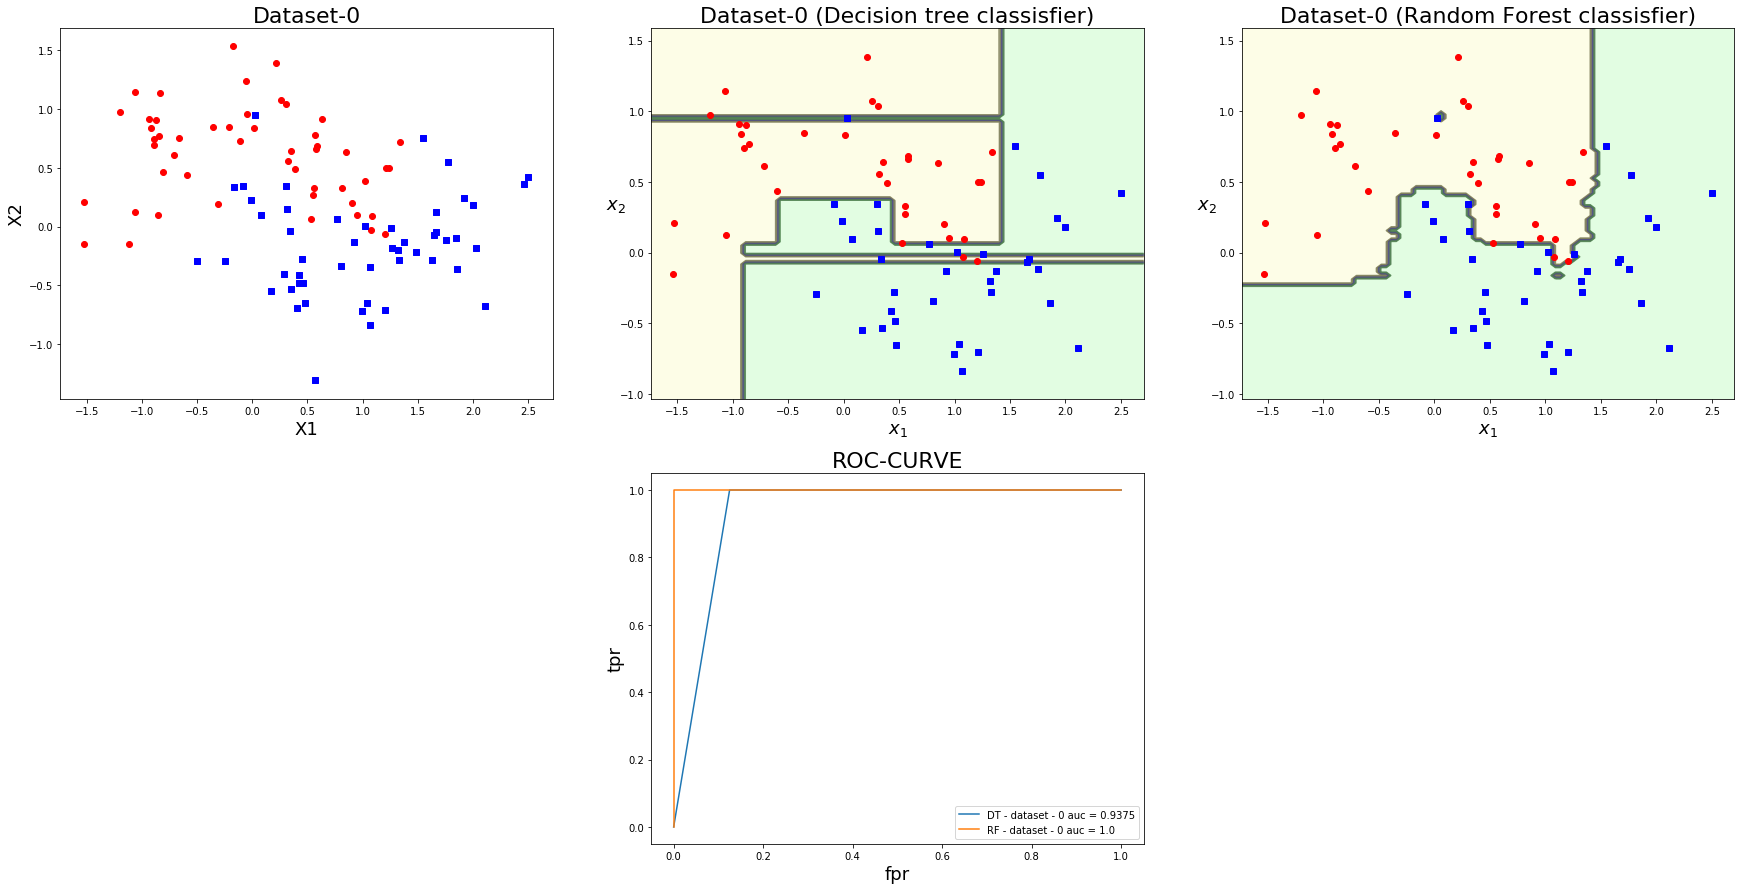

The auc score(Decision tree) is : 0.9375
The auc score(Random Forest) is : 1.0

Dataset-1
The train accuracy score obtained using Decision trees is : 1.0
The test accuracy score obtained using Decision trees is : 0.7333333333333333
The train accuracy score obtained using random forest is : 1.0
The test accuracy score obtained using random forest is : 0.7666666666666667


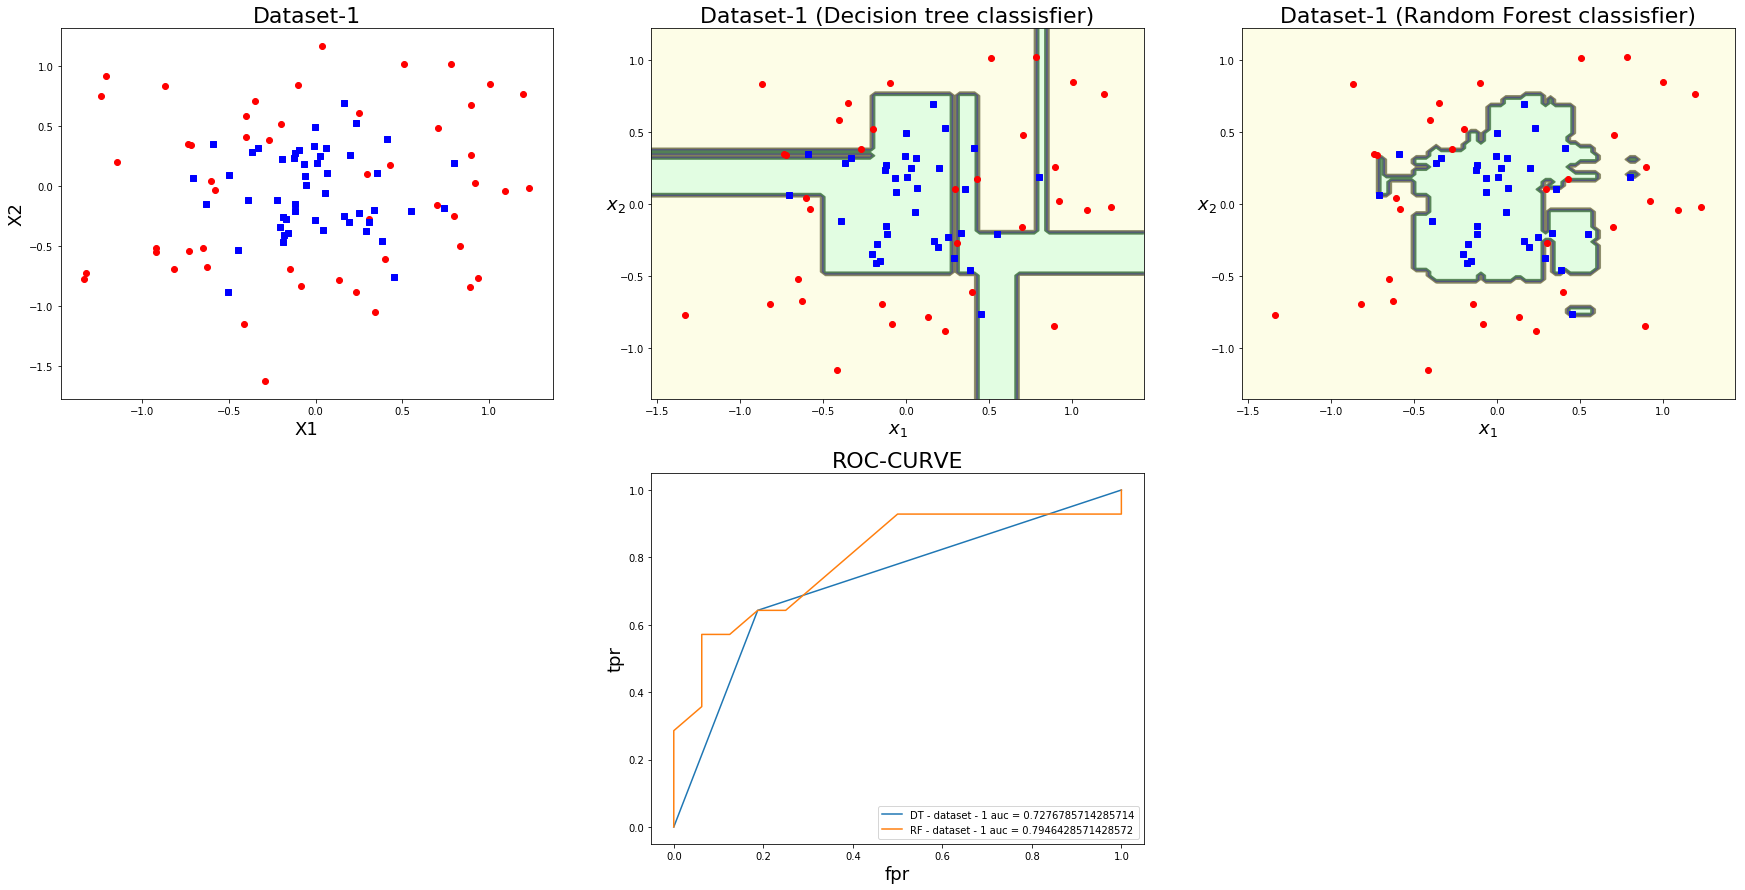

The auc score(Decision tree) is : 0.7276785714285714
The auc score(Random Forest) is : 0.7946428571428572

Dataset-2
The train accuracy score obtained using Decision trees is : 1.0
The test accuracy score obtained using Decision trees is : 0.8333333333333334
The train accuracy score obtained using random forest is : 1.0
The test accuracy score obtained using random forest is : 0.8333333333333334


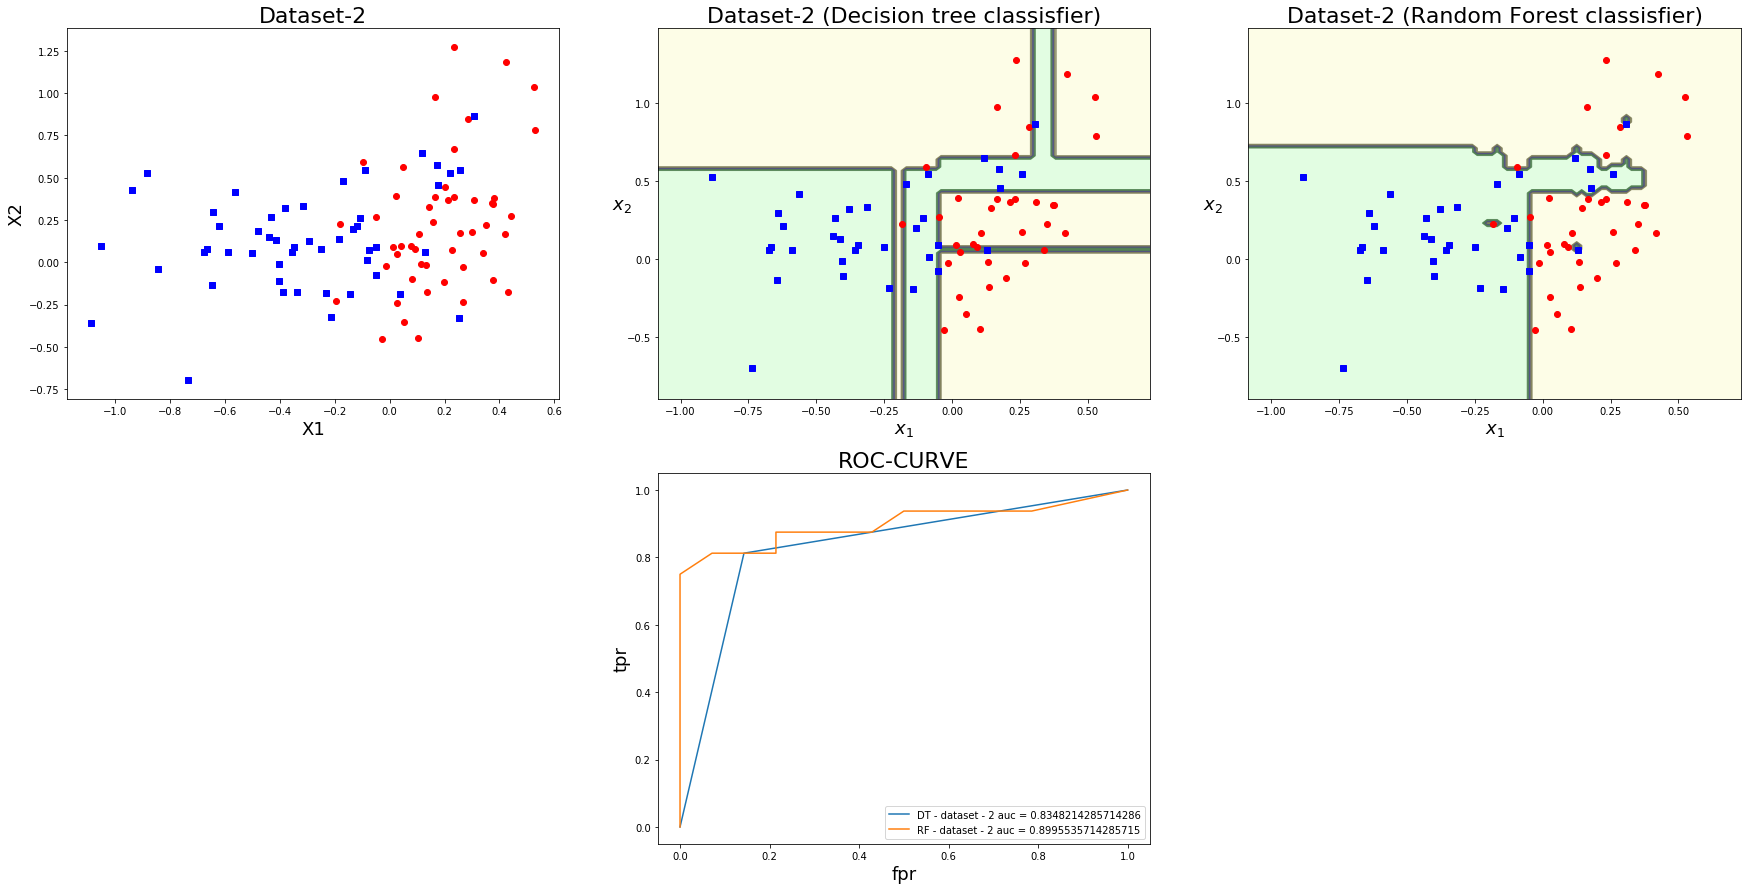

The auc score(Decision tree) is : 0.8348214285714286
The auc score(Random Forest) is : 0.8995535714285715

Dataset-3
The train accuracy score obtained using Decision trees is : 1.0
The test accuracy score obtained using Decision trees is : 0.9666666666666667
The train accuracy score obtained using random forest is : 1.0
The test accuracy score obtained using random forest is : 1.0


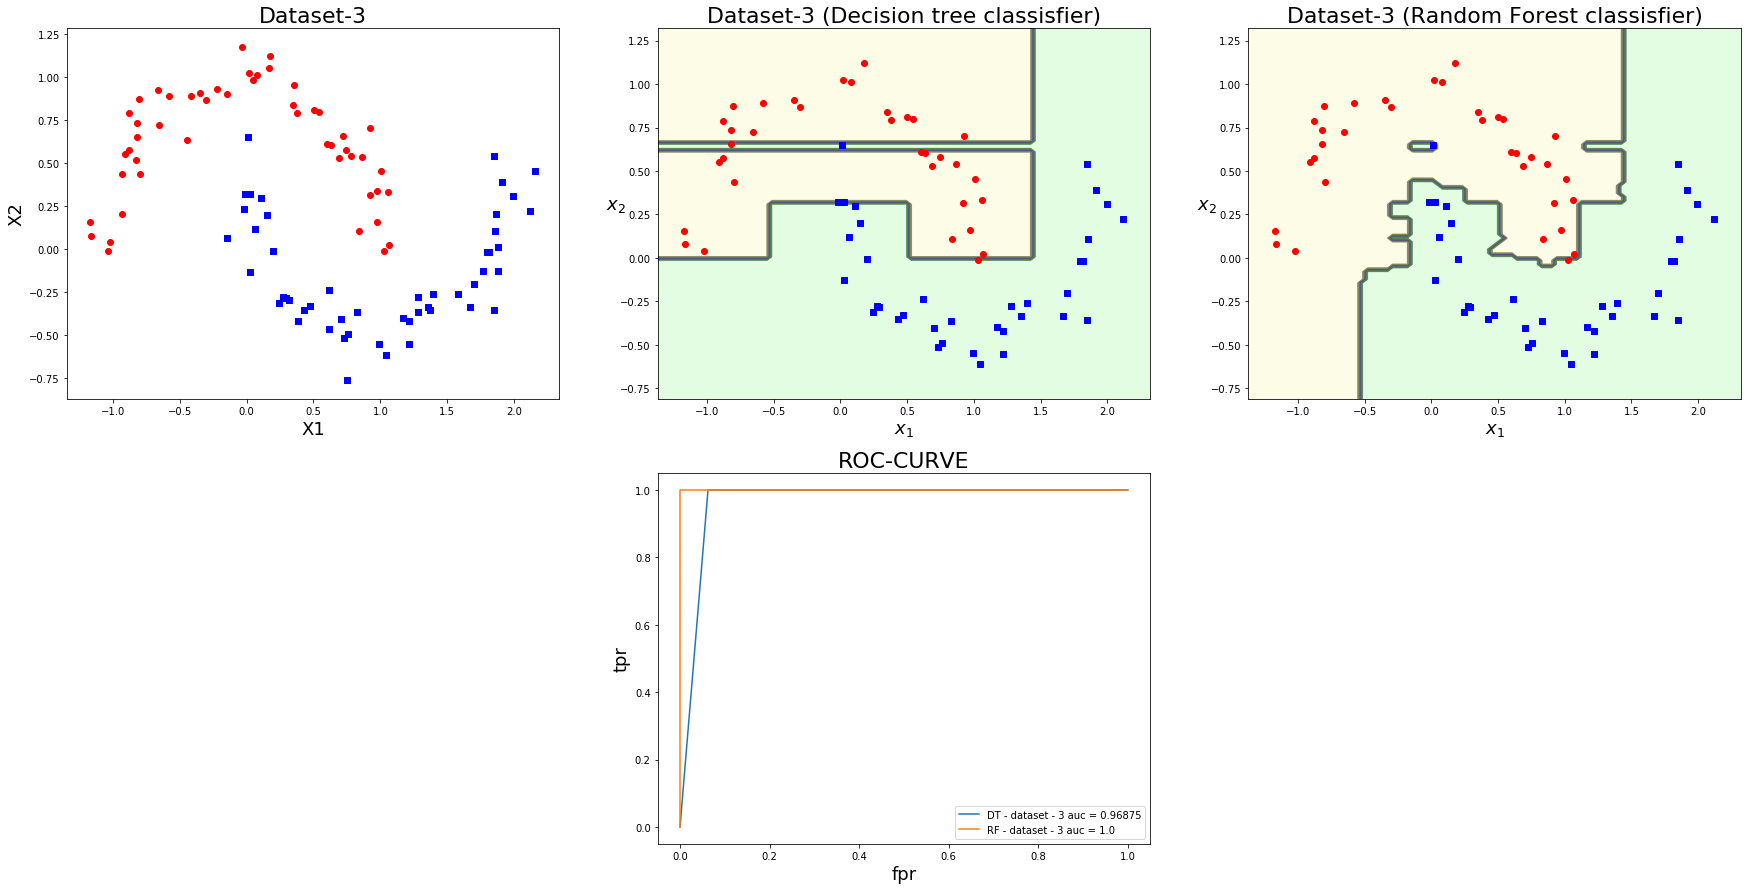

The auc score(Decision tree) is : 0.96875
The auc score(Random Forest) is : 1.0

Dataset-4
The train accuracy score obtained using Decision trees is : 1.0
The test accuracy score obtained using Decision trees is : 0.8666666666666667
The train accuracy score obtained using random forest is : 1.0
The test accuracy score obtained using random forest is : 0.9666666666666667


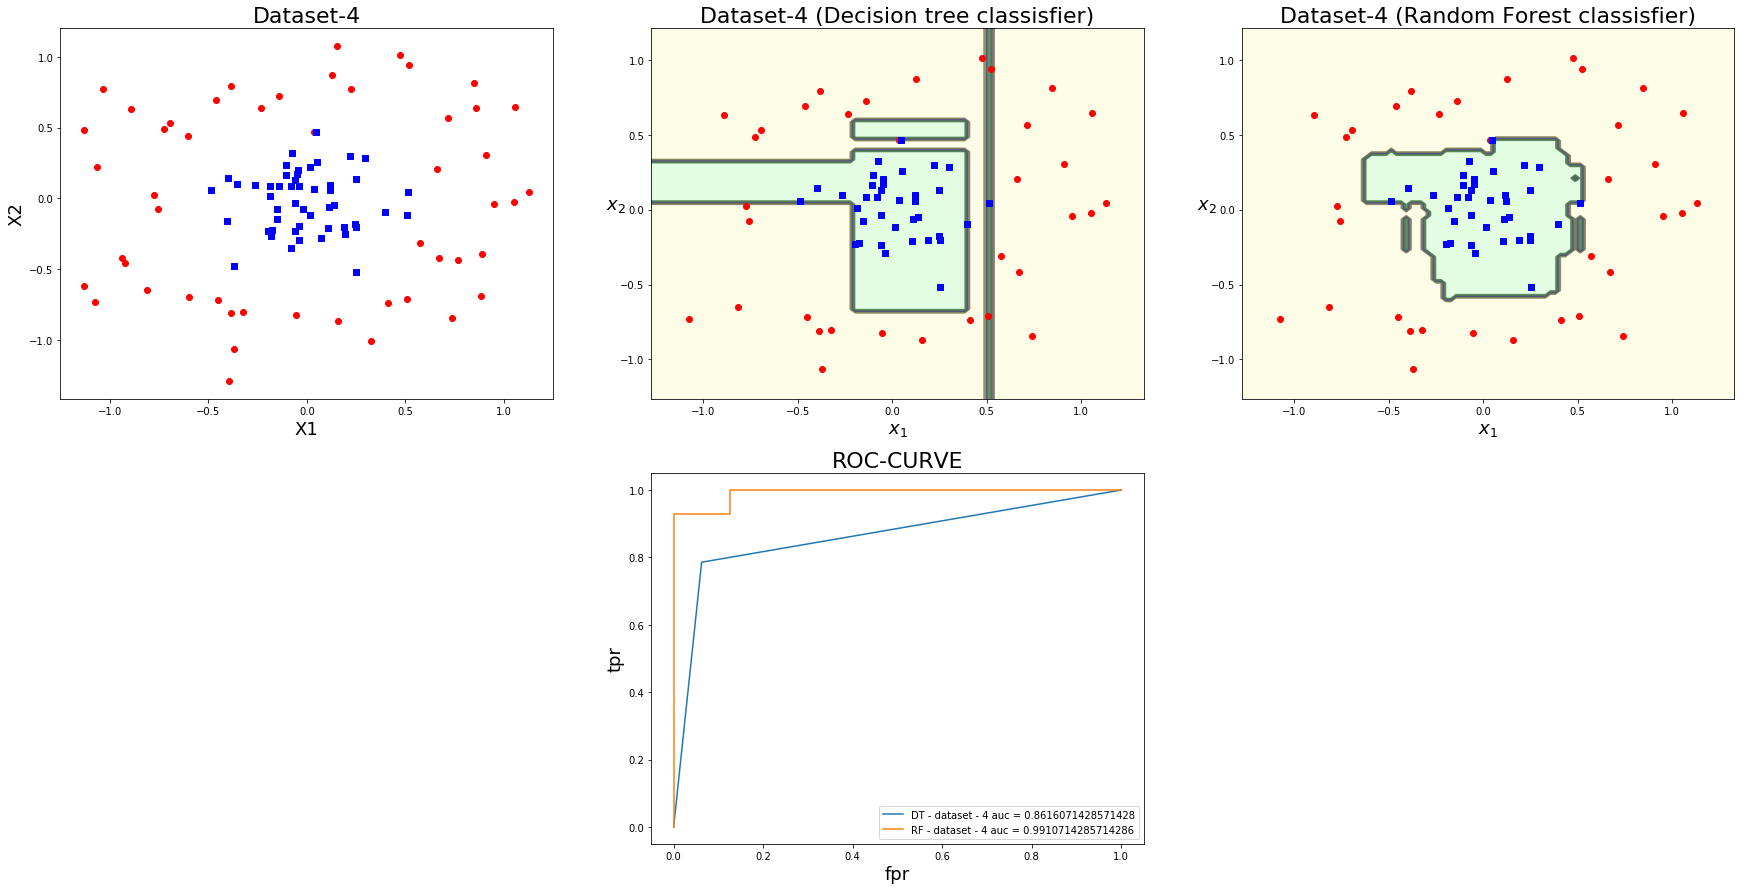

The auc score(Decision tree) is : 0.8616071428571428
The auc score(Random Forest) is : 0.9910714285714286

Dataset-5
The train accuracy score obtained using Decision trees is : 1.0
The test accuracy score obtained using Decision trees is : 1.0
The train accuracy score obtained using random forest is : 1.0
The test accuracy score obtained using random forest is : 1.0


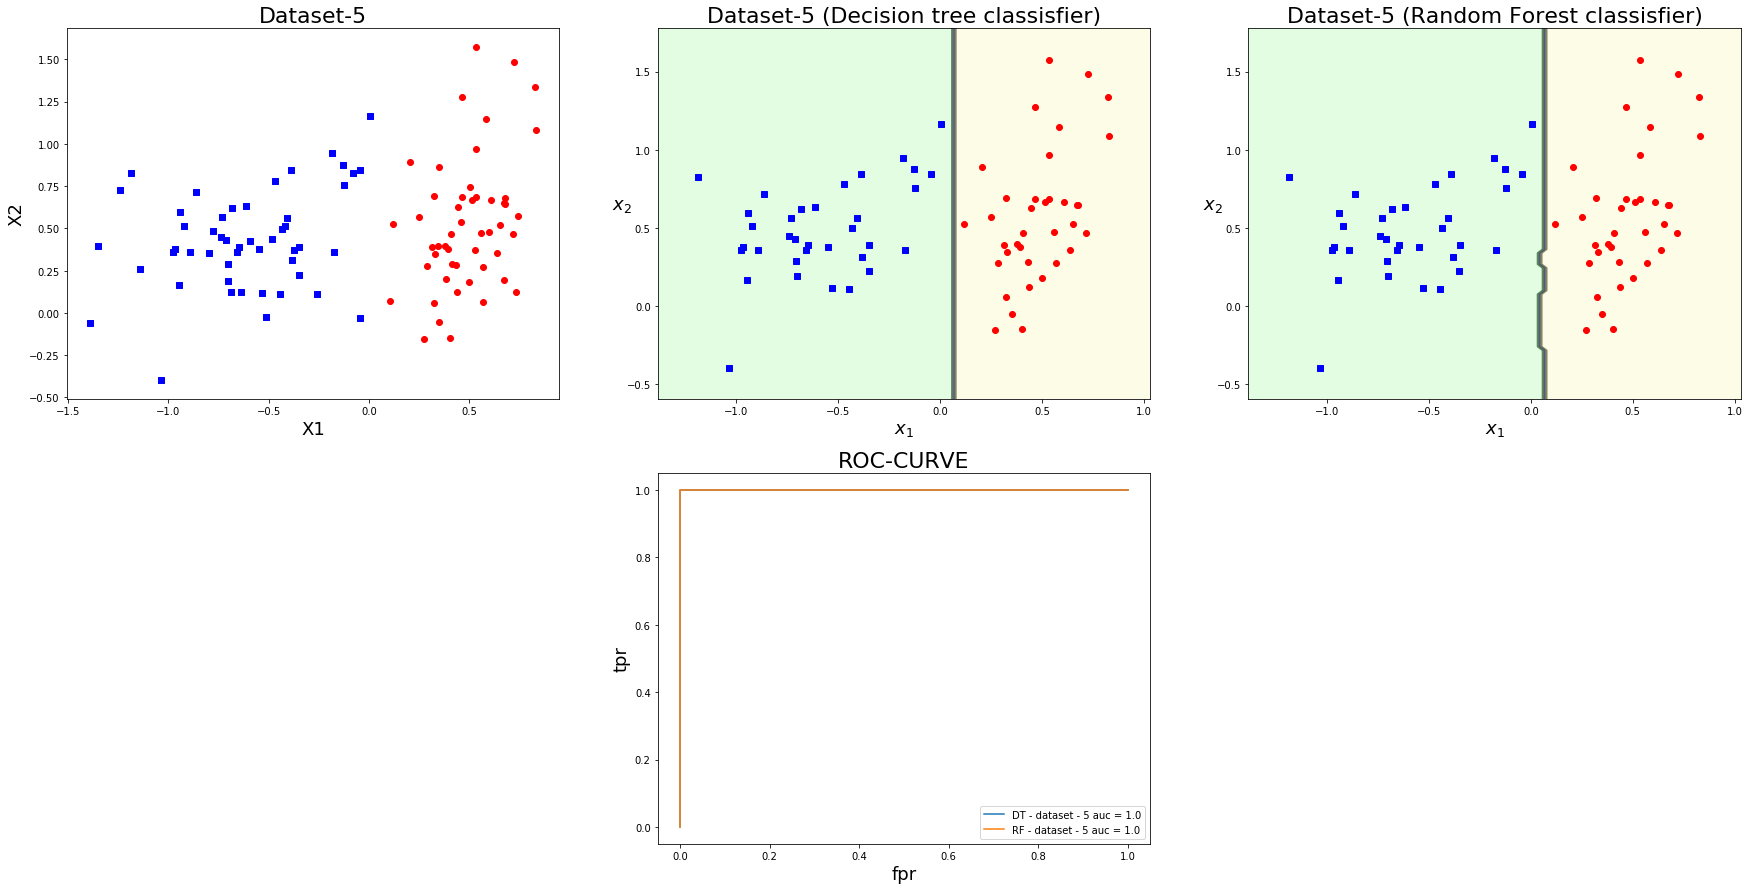

The auc score(Decision tree) is : 1.0
The auc score(Random Forest) is : 1.0


In [6]:
datasets=[]
for i in range(6):
    print("\nDataset-{}". format(i))
    datasets.append((np.load('X{}.npy'.format(i)),np.load('y{}.npy'.format(i))))
    data = datasets[i]
    X = data[0]
    Y = data[1]
    # training Decision tree classifier
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1) 
    dt_clf = DecisionTreeClassifier(random_state = 1)
    dt_fit = dt_clf.fit(X_train, Y_train)
    y_pred_train = dt_fit.predict(X_train)
    y_pred_test = dt_fit.predict(X_test)
    print("The train accuracy score obtained using Decision trees is :", accuracy_score(y_pred_train, Y_train))
    print("The test accuracy score obtained using Decision trees is :", accuracy_score(y_pred_test, Y_test))
    x1_max, x1_min = max(X_train[:,0]), min(X_train[:,0])
    x2_max, x2_min = max(X_train[:,1]), min(X_train[:,1])
    
    f = plt.figure(figsize=(30, 15))
    f.add_subplot(231)
    plt.scatter(X[Y == 0][:,0], X[Y == 0][:,1] , c = 'r')
    plt.scatter(X[Y == 1][:,0], X[Y == 1][:,1] , c = 'b', marker = 's')
    plt.title('Dataset-{}'. format(i),fontsize=22)
    plt.xlabel('X1',fontsize=18)
    plt.ylabel('X2',fontsize=18)
    
    f.add_subplot(232)
    plot_decision_boundary(dt_fit, X_train, Y_train, axes = [x1_min - 0.2, x1_max + 0.2, x2_min - 0.2, x2_max + 0.2])
    plt.title('Dataset-{} (Decision tree classisfier)'. format(i),fontsize=22)
    
    # training Random forest classifier
    rf_clf = RandomForestClassifier(n_estimators = 20, random_state = 1)
    rf_fit = rf_clf.fit(X_train, Y_train)
    y_pred_train_rf = rf_fit.predict(X_train)
    y_pred_test_rf  = rf_fit.predict(X_test)
    print("The train accuracy score obtained using random forest is :", accuracy_score(y_pred_train_rf, Y_train))
    print("The test accuracy score obtained using random forest is :", accuracy_score(y_pred_test_rf, Y_test))
    
    f.add_subplot(233)
    plot_decision_boundary(rf_fit, X_train, Y_train, axes = [x1_min - 0.2, x1_max + 0.2, x2_min - 0.2, x2_max + 0.2])
    plt.title('Dataset-{} (Random Forest classisfier)'. format(i),fontsize=22)
    
    
    # plotting roc curves
    test_prob = dt_clf.predict_proba(X_test)[:,1]
    test_prob2 = rf_clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(Y_test, test_prob) 
    fpr2, tpr2, _ = roc_curve(Y_test, test_prob2) 
    auc = roc_auc_score(Y_test, test_prob)
    auc2 = roc_auc_score(Y_test, test_prob2)
    f.add_subplot(235)
    plt.plot(fpr,tpr,label="DT - dataset - {} auc = {}".format(i, auc))
    plt.plot(fpr2,tpr2,label="RF - dataset - {} auc = {}".format(i, auc2))
    plt.title('ROC-CURVE',fontsize=22)
    plt.legend(loc=4)
    plt.xlabel('fpr',fontsize=18)
    plt.ylabel('tpr',fontsize=18)
    plt.show()
    print("The auc score(Decision tree) is :", auc)
    print("The auc score(Random Forest) is :", auc2)

## Digit Classification
In this exercise you will perform handwritten digit classificaiton using random forests and study the effect of hyperparameters on random forests.
1. Load the digits dataset from sklearn and visualize 10 samples.
2. Vary the number of trees in a random forest classifier from 1 to 1000 in 10 logarithmic steps using the np.logspace function and plot the accuracy. Explain the results.
3. Observe the changes in performance when you vary the max depth of trees from 1 to 10 in steps of 1. Draw an accuracy heat-map by varying both the number of trees and max depth. Explain the results. (a heatmap is a 2D array of scalars. In this case the scalar is accuracy and the axes of the matrix vary the depth and number of trees)

 The images in the given dataset are as follows:


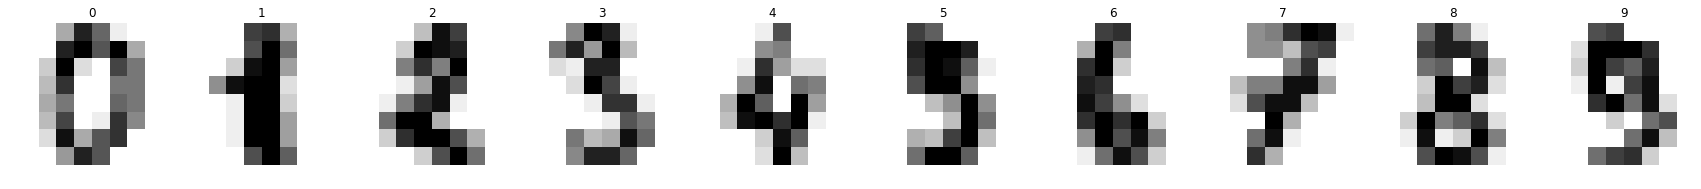

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

# visualizing the images in the dataset 
print(" The images in the given dataset are as follows:")
plt.figure(figsize = (30,15))
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('%i' % label)

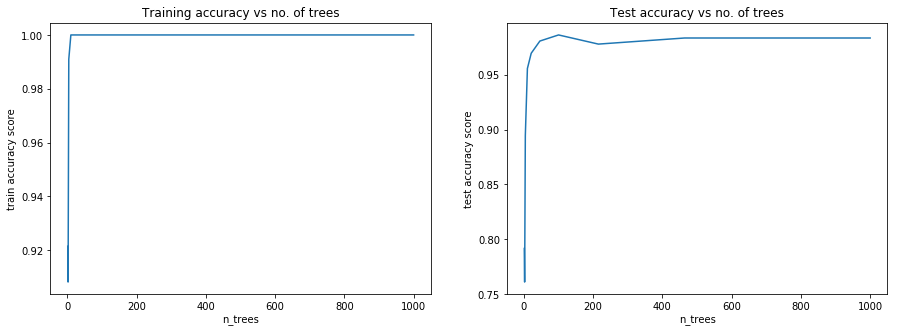

In [5]:
# splitting the dataset as train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size = 0.20, random_state = 1)
n_tree = np.geomspace(1.0, 1000.0, 10, dtype = int)
train_acc = np.zeros((n_tree.shape[0]))
test_acc = np.zeros((n_tree.shape[0]))
for i in range(n_tree.shape[0]):
    rf_clf = RandomForestClassifier(n_estimators = n_tree[i])
    rf_fit = rf_clf.fit(X_train, Y_train)
    y_pred_train_rf = rf_fit.predict(X_train)
    y_pred_test_rf  = rf_fit.predict(X_test)
    train_acc[i] = accuracy_score(y_pred_train_rf, Y_train)
    test_acc[i] = accuracy_score(y_pred_test_rf, Y_test)

f = plt.figure(figsize = (15,5))
f.add_subplot(121)
plt.plot(n_tree, train_acc)
plt.title('Training accuracy vs no. of trees')
plt.xlabel('n_trees')
plt.ylabel('train accuracy score')
f.add_subplot(122)
plt.plot(n_tree, test_acc)
plt.title('Test accuracy vs no. of trees')
plt.xlabel('n_trees')
plt.ylabel('test accuracy score')
plt.show()

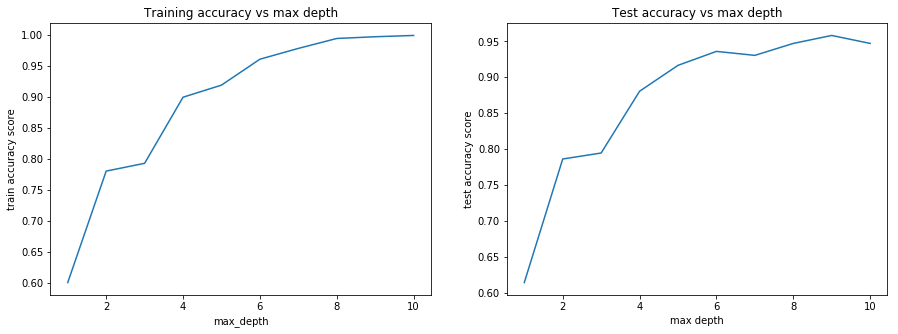

In [6]:
max_dep = np.arange(1,11)
train_acc = np.zeros((max_dep.shape[0]))
test_acc = np.zeros((max_dep.shape[0]))
for i in max_dep:
    rf_clf = RandomForestClassifier(max_depth = i)
    rf_fit = rf_clf.fit(X_train, Y_train)
    y_pred_train_rf = rf_fit.predict(X_train)
    y_pred_test_rf  = rf_fit.predict(X_test)
    train_acc[i-1] = accuracy_score(y_pred_train_rf, Y_train)
    test_acc[i-1] = accuracy_score(y_pred_test_rf, Y_test)

f = plt.figure(figsize = (15,5))
f.add_subplot(121)
plt.plot(max_dep, train_acc)
plt.title('Training accuracy vs max depth')
plt.xlabel('max_depth')
plt.ylabel('train accuracy score')
f.add_subplot(122)
plt.plot(max_dep, test_acc)
plt.title('Test accuracy vs max depth')
plt.xlabel('max depth')
plt.ylabel('test accuracy score')
plt.show()

In [7]:
train_acc_n = np.zeros((max_dep.shape[0], n_tree.shape[0]))
test_acc_n = np.zeros((max_dep.shape[0], n_tree.shape[0]))

for i in range(max_dep.shape[0]):
    for j in range(n_tree.shape[0]):
        rf_clf = RandomForestClassifier(n_estimators = n_tree[j], max_depth = max_dep[i])
        rf_fit = rf_clf.fit(X_train, Y_train)
        y_pred_train_rf = rf_fit.predict(X_train)
        y_pred_test_rf  = rf_fit.predict(X_test)
        train_acc_n[i][j] = accuracy_score(y_pred_train_rf, Y_train)
        test_acc_n[i][j] = accuracy_score(y_pred_test_rf, Y_test)

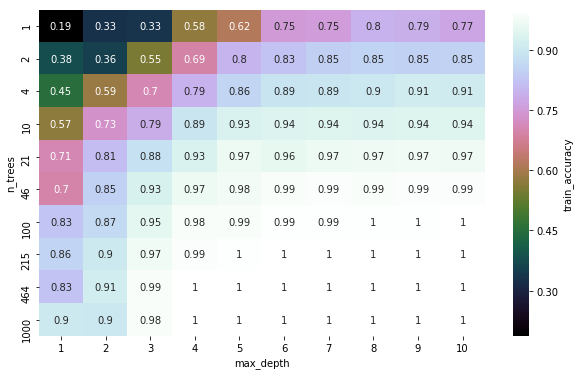

In [13]:
import seaborn as sns
import pandas as pd

n_tree = list(n_tree)
dat_tree = [[i]*10 for i in n_tree]
dat_tree = np.hstack(dat_tree)
df = pd.DataFrame(dat_tree, columns = ['n_trees'])
dat_depth = np.array(list(max_dep)*10)
df['max_depth'] = dat_depth 
dat_acc_train = np.hstack(train_acc_n)
df['train_accuracy'] = dat_acc_train
dat_acc_test = np.hstack(test_acc_n)
df['test_accuracy'] = dat_acc_test
# heatmap for train accuracy
plt.figure(figsize = (10,6))
df1 = df.pivot('n_trees', 'max_depth', 'train_accuracy')
ax = sns.heatmap(df1, cmap = "cubehelix", annot=True, cbar_kws={'label': 'train_accuracy'})

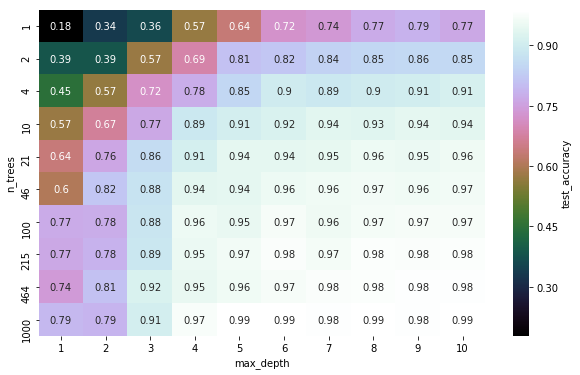

In [14]:
# heatmap for test accuracy
plt.figure(figsize = (10,6))
df2 = df.pivot('n_trees', 'max_depth', 'test_accuracy')
ax = sns.heatmap(df2 , cmap="cubehelix", annot=True ,cbar_kws={'label': 'test_accuracy'})